In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/content/sample_data/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


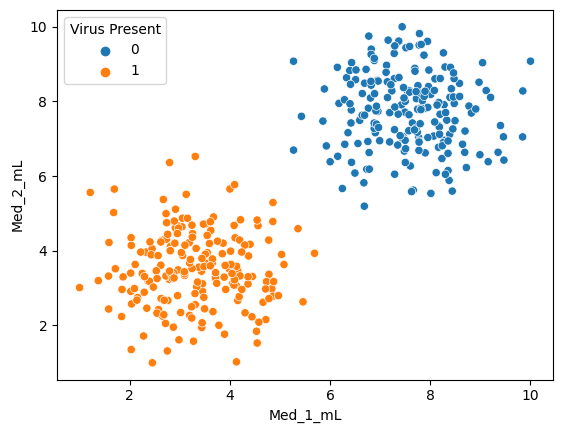

In [4]:
sns.scatterplot(x='Med_1_mL', y = 'Med_2_mL', data = df, hue = 'Virus Present');

Woah! Clearly Separable.

Let's create hyperplane in it manually.

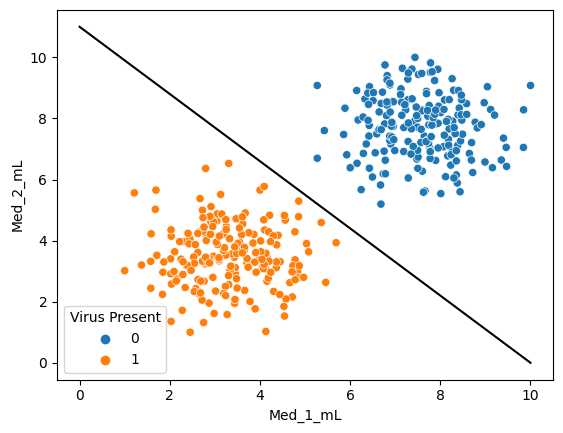

In [7]:
sns.scatterplot(x='Med_1_mL', y = 'Med_2_mL', data = df, hue = 'Virus Present')
x = np.linspace(0,10,100)
m = -1  # we want slope of -1
b = 11
y = m*x+b

plt.plot(x,y, 'black');

Let's do slope of -1.1

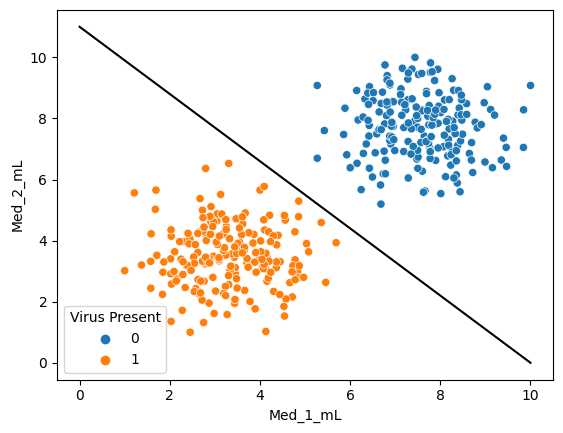

In [8]:
sns.scatterplot(x='Med_1_mL', y = 'Med_2_mL', data = df, hue = 'Virus Present')
x = np.linspace(0,10,100)
m = -1.1  # we want slope of -1.1
b = 11
y = m*x+b

plt.plot(x,y, 'black');

It is still separating but it is closer to class 1. So, adding noise.

Let's first check it with support vector classifier.

In [10]:
from sklearn.svm import SVC

In SVC, we need these parameters:

  1. **kernel:** by default is 'rbf'. Other options are: 'linear', 'poly', 'sigmoid', 'precomputed' etc.

  2. **C:** It is regularization parameter. If we want to allow for miscalssification, then we have to adjust this parameter. **Higher C means less misclassification.**



In [24]:
X = df.drop('Virus Present', axis = 1)
y = df['Virus Present']

In [25]:
model1 = SVC(kernel = 'linear', C = 1000)
model1.fit(X, y)

SVC(C=1000, kernel='linear')

Sklearn doesn't show us the drawn line. We have to do this manually. So, always use the function below to draw line.

In [18]:
def plot_svm_boundary(model,X,y):

    X = X.values
    y = y.values

    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')


    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

Let's plot this boundary line to our model.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


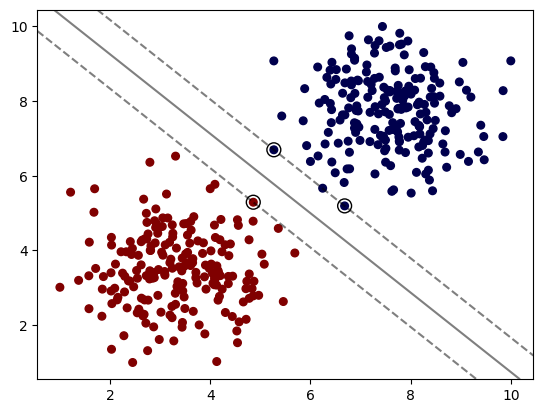

In [27]:
plot_svm_boundary(model1,X,y);

Look at those 3 support vectors and those soft margins.

Let's change the c value and then check the difference.

In [31]:
model2 = SVC(kernel = 'linear', C = 0.1)
model2.fit(X, y)

SVC(C=0.1, kernel='linear')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


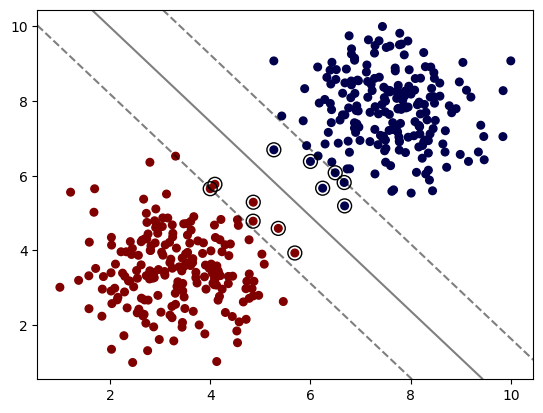

In [32]:
plot_svm_boundary(model2,X,y);

Smaller value of C means more miscalssifictions allowed.

Let's try different kernels.

In [33]:
model3 = SVC(kernel = 'rbf', C = 1)
model3.fit(X, y)

SVC(C=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


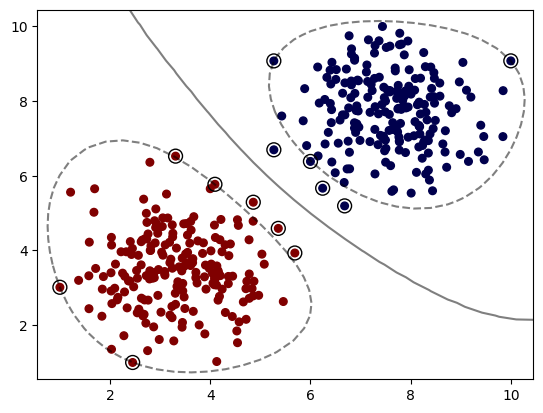

In [35]:
plot_svm_boundary(model3,X,y);

In it, margins look like clusters of classes. Good!

There is one more parameter 'gamma' in SVC. It is kernel coefficient.

To understand it simply, let's consider a scenario where you have a dataset and you want to classify it using SVM with the kernel. The 'gamma' parameter controls how far the influence of a single training example reaches.

* When the 'gamma' value is low, it means that the model will consider a larger neighborhood of points when making predictions, resulting in a smoother decision boundary.

* On the other hand, when the 'gamma' value is high, the model will focus more on the individual training examples and their immediate neighbors when making predictions, resulting in a more complex decision boundary that can better fit the training data.

In simpler words, low 'gamma' values lead to a more generalized and smoother decision boundary, while high 'gamma' values result in a more specific and wiggly decision boundary.

It is:

gamma = {'scale', 'auto'}

default is scale.

Auto = 1/n_features

Scale = 1/(n_features * X.var())

In above parts, we didnt do scaling because it was done by default if not written using gamma.

In [36]:
model3 = SVC(kernel = 'rbf', C = 1, gamma = 0.9)
model3.fit(X, y)

SVC(C=1, gamma=0.9)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


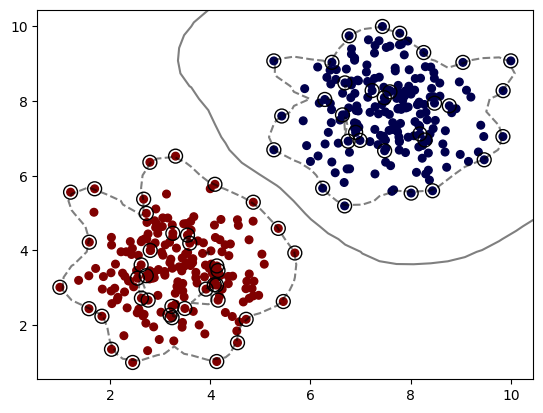

In [37]:
plot_svm_boundary(model3,X,y);

In [38]:
model3 = SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model3.fit(X, y)

SVC(C=1, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


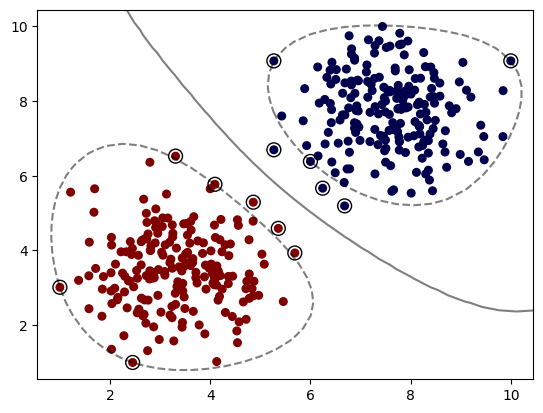

In [39]:
plot_svm_boundary(model3,X,y);

In [40]:
model3 = SVC(kernel = 'sigmoid')
model3.fit(X, y)

SVC(kernel='sigmoid')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


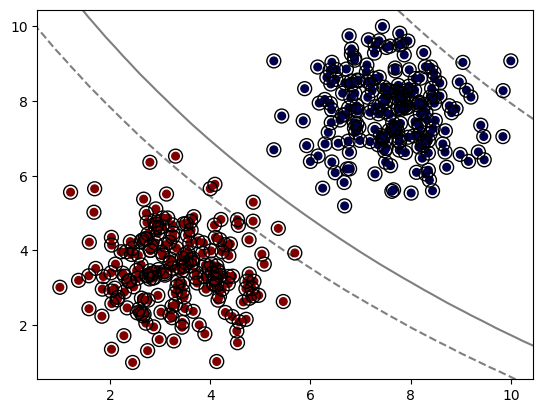

In [41]:
plot_svm_boundary(model3,X,y);

Ughhh!!! Using sigmoid, almost all points are highlighted as support vectors. So sigmoid is not recommended.

In [44]:
model3 = SVC(kernel = 'poly', degree = 3)
model3.fit(X, y)

SVC(kernel='poly')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


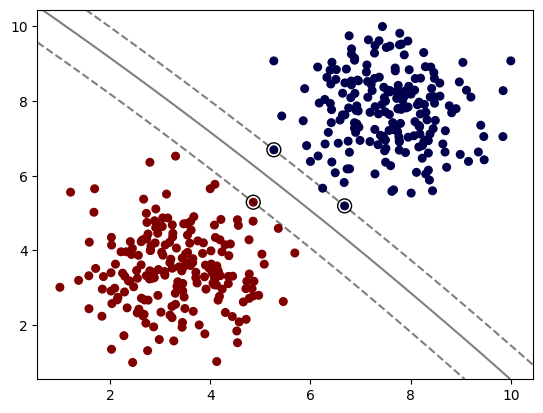

In [45]:
plot_svm_boundary(model3,X,y);

With degree 1, poly is same as linear.

Let's use grid search.

In [47]:
from sklearn.model_selection import GridSearchCV

svm = SVC()
param_grid = {'C': [0.01, 0.1, 1],
              'kernel': ['linear', 'rbf']}

model = GridSearchCV(svm, param_grid)

In [48]:
model.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [49]:
model.best_params_

{'C': 0.01, 'kernel': 'linear'}

As expected!